In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
features = pd.read_csv('kaggle-ner.csv')
list(features.columns)

['Unnamed: 0',
 'TF',
 'Bigram TF',
 'No. of Stop_words',
 'Out of Context',
 'Arts, Culture, Entertainment, Sports',
 'Conspiracy',
 'Business and Industrial',
 'economy, business and finance',
 'Religion and belief',
 'Law, Government and Politics',
 'Education',
 'Technology and Computing',
 'Science',
 'Sixltr',
 'conj',
 'interrog',
 'number',
 'negemo',
 'social',
 'certain',
 'percept',
 'focuspast',
 'focuspresent',
 'time',
 'ORG',
 'PERSON',
 'GPE']

In [3]:
features.drop(columns=['Unnamed: 0'], inplace=True)
features.fillna(0,inplace=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 27 columns):
TF                                      107 non-null float64
Bigram TF                               107 non-null int64
No. of Stop_words                       107 non-null float64
Out of Context                          107 non-null float64
Arts, Culture, Entertainment, Sports    107 non-null float64
Conspiracy                              107 non-null float64
Business and Industrial                 107 non-null float64
economy, business and finance           107 non-null float64
Religion and belief                     107 non-null float64
Law, Government and Politics            107 non-null float64
Education                               107 non-null float64
Technology and Computing                107 non-null float64
Science                                 107 non-null float64
Sixltr                                  107 non-null float64
conj                                    107

In [4]:
df= pd.read_pickle('KaggleEmergent-dup.pkl')
list(df.columns)

['emergent_page',
 'claim',
 'claim_description',
 'claim_label',
 'tags',
 'claim_source_domain',
 'claim_course_url',
 'date',
 'body',
 'page_domain',
 'page_url',
 'page_headline',
 'page_position',
 'page_shares',
 'page_order',
 'claim_pos',
 'spelling',
 'grammar_error',
 'topic modelling',
 'clean_text',
 'TF',
 'out of context terms',
 'out of context final',
 'Textrazor_category',
 'Textrazor_topic',
 'Topics_category',
 'Topics_topic',
 'score_category',
 'score_topic',
 'category_score_final',
 'category_list_final',
 'topic_score_final',
 'topic_list_final',
 'TF_temp',
 'formula 1',
 'formula 2',
 'bigram TF',
 'bigram TF final',
 'No. of stop_words',
 'arts, culture and entertainment',
 'Conspiracy',
 'crime, law and justice',
 'Criticism of journalism',
 'Advertising video on demand',
 'computing and information technology',
 'agriculture',
 'energy and resource',
 'economy, business and finance',
 'Harassment',
 'Cyberspace',
 'religion and belief',
 'Politics and tech

In [5]:
print(len(df))
print(len(features))

107
107


In [6]:
df.head()

,emergent_page,claim,claim_description,claim_label,tags,claim_source_domain,claim_course_url,date,body,page_domain,...,social,certain,percept,focuspast,focuspresent,time,"Arts, Culture, Entertainment, Sports",Business and Industrial,"Law, Government and Politics",religion & social epistemology
0,http://www.emergent.info/disney-collector-is-f...,Claim: The woman behind the hugely popular DC ...,The channel has racked up more than 2.8 billio...,Unverified,"Daiane+DeJesus,DC+Toys+Collector,Porm,Sandy+Su...",dailymail.co.uk,http://www.dailymail.co.uk/news/article-295824...,2/25/2017,The Daily Mail published a story on Feb 24 tha...,dailymail.co.uk,...,17.36,1.65,5.79,4.13,9.09,4.13,0.00000,0.0,0.635650,0.000
3,http://www.emergent.info/20-year-old-McDonalds...,Claim: Two Australian men kept a McDonald's Qu...,They say it's the world's oldest burger.,Unverified,"Australia,Food,Hamburger,McDonald's,Quarter+Po...",facebook.com,https://www.facebook.com/pages/Can-This-20-Yea...,2/17/2017,"Two friends, Casey Dean and Eduard Nitz, say t...",mirror.co.uk,...,9.48,0.86,3.45,3.45,13.79,7.76,0.00000,0.0,0.000000,0.000
12,http://www.emergent.info/tbs-speeds-up-Seinfeld,Claim: TBS speeds up Seinfeld episodes to fit ...,"A video posted on YouTube, and then shared on ...",Unverified,"Seinfeld,TBS,TV",avsforum.com,http://www.avsforum.com/forum/34-hdtv-programm...,2/17/2017,On Feb. 15 Reedit user Retrorocket posted a li...,avsforum.com,...,1.82,1.82,3.64,5.45,4.55,6.36,0.63850,0.0,0.000000,0.000
24,http://www.emergent.info/Star-Wars-early-summe...,Claim: J.J. Abrams wants a summer release date...,It was claimed that director JJ Abrams talked ...,FALSE,"iKwiz,J.J.+Abrams,Star+Wars,Video,YouTube",journalmetro.com,http://journalmetro.com/opinions/inspecteur-vi...,2/12/2017,Metro Montreal debunked this claim in 11 point...,ikwiz.com,...,8.93,0.00,1.79,1.79,3.57,3.57,0.21036,0.0,0.114916,0.107
34,http://www.emergent.info/brokaw-wants-williams...,Claim: Tom Brokaw wants Brian Williams fired,An anonymous source claims the former NBC News...,FALSE,"Brian+Williams,NBC,Tom+Brokaw",m.huffpost.com,http://m.huffpost.com/us/entry/6630536?1423238572,2/6/2017,"Tom Brokaw emailed The Huffington Post to say,...",pagesix.com,...,12.24,2.04,4.08,2.04,8.16,2.04,0.45300,0.0,0.488333,0.000


In [7]:
df.claim_label.value_counts()

Unverified    41
FALSE         41
TRUE          25
Name: claim_label, dtype: int64

In [7]:
from keras.utils import np_utils
dict = {'FALSE' : 0, 'TRUE' : 1, 'Unverified' : 2}
#creating the dependant variable y
y= df.loc[:,['claim_label']]
y=y.replace({"claim_label": dict})
y=y.iloc[:,0].values
y = np_utils.to_categorical(y)
print(y.shape)

C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(107, 3)


In [8]:
import re
def remove_claim(text):
    return re.sub(r'Claim:', ' ', text)
df.loc[:,'claim']= df.loc[:, 'claim'].apply(remove_claim)

In [9]:
df.loc[:10,'claim']

0      The woman behind the hugely popular DC Toys ...
3      Two Australian men kept a McDonald's Quarter...
Name: claim, dtype: object

In [110]:
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
tokenizer= Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=" ")

sentences_train, sentences_test, y_train, y_test = train_test_split(
       df['claim'].values, y, test_size=0.20, random_state=1000, stratify=df.claim_label)

tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

In [111]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

609


In [112]:
from statistics import mean 
train_lengths= [len(x) for x in X_train]
print(mean(train_lengths))
print(max(train_lengths))

11.905882352941177
23


In [113]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 14
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [114]:
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras import layers
from keras.models import Model
from keras.layers import  Activation, Dense, Dropout, Input, Embedding, Bidirectional, TimeDistributed, Flatten
from keras.layers.recurrent import GRU, SimpleRNN, LSTM
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
embedding_dim = 50

def Lstm():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(vocab_size,24,input_length=maxlen)(inputs)
    layer = LSTM(24)(layer)
#     layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(3, activation='softmax', name='out_layer')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

def RNN():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(vocab_size,24,input_length=maxlen)(inputs)
    layer = SimpleRNN(24)(layer)
#     layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(3, activation='softmax', name='out_layer')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

def Gru():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(vocab_size,24,input_length=maxlen)(inputs)
    layer = GRU(24)(layer)
#     layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(3, activation='softmax', name='out_layer')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

def Bi_LSTM():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(vocab_size,24,input_length=maxlen)(inputs)
    layer =  Bidirectional (LSTM (24,return_sequences=True,dropout=0.50),merge_mode='concat')(layer)
    layer = TimeDistributed(Dense(24,activation='relu'))(layer)
    layer = Flatten()(layer)
#     layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(3, activation='softmax', name='out_layer')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [115]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [116]:
#CREATE MODEL AND TRAIN
print("This is an LSTM Model: ")
lstm1 = Lstm()
lstm1.summary()
lstm1.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
lstm1.fit(X_train,y_train,batch_size=8,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = lstm1.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = lstm1.predict(X_test, verbose=0)
yhat_classes=yhat_probs.argmax(axis=-1)

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test.argmax(axis=-1), yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test.argmax(axis=-1), yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = multiclass_roc_auc_score(y_test.argmax(axis=-1), yhat_probs.argmax(axis=-1),  average='macro')
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test.argmax(axis=-1), yhat_classes)
print(matrix)

This is an LSTM Model: 
Model: "model_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 14)                0         
_________________________________________________________________
embedding_77 (Embedding)     (None, 14, 24)            14616     
_________________________________________________________________
lstm_39 (LSTM)               (None, 24)                4704      
_________________________________________________________________
activation_77 (Activation)   (None, 24)                0         
_________________________________________________________________
dropout_77 (Dropout)         (None, 24)                0         
_________________________________________________________________
out_layer (Dense)            (None, 3)                 75        
Total params: 19,395
Trainable params: 19,395
Non-trainable params: 0
______________________________

C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [136]:
#CREATE MODEL AND TRAIN
print("This is an LSTM Model: ")
lstm2 = Lstm()
lstm2.summary()
lstm2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
lstm2.fit(X_train,y_train,batch_size=8,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = lstm2.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = lstm2.predict(X_test, verbose=0)
yhat_classes=yhat_probs.argmax(axis=-1)

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test.argmax(axis=-1), yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test.argmax(axis=-1), yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = multiclass_roc_auc_score(y_test.argmax(axis=-1), yhat_probs.argmax(axis=-1),  average='macro')
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test.argmax(axis=-1), yhat_classes)
print(matrix)

This is an LSTM Model: 
Model: "model_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 14)                0         
_________________________________________________________________
embedding_96 (Embedding)     (None, 14, 24)            14616     
_________________________________________________________________
lstm_45 (LSTM)               (None, 24)                4704      
_________________________________________________________________
activation_96 (Activation)   (None, 24)                0         
_________________________________________________________________
dropout_96 (Dropout)         (None, 24)                0         
_________________________________________________________________
out_layer (Dense)            (None, 3)                 75        
Total params: 19,395
Trainable params: 19,395
Non-trainable params: 0
______________________________

C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [118]:
#CREATE MODEL AND TRAIN
print("This is an LSTM Model: ")
lstm3 = Lstm()
lstm3.summary()
lstm3.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
lstm3.fit(X_train,y_train,batch_size=8,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = lstm3.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = lstm3.predict(X_test, verbose=0)
yhat_classes=yhat_probs.argmax(axis=-1)

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test.argmax(axis=-1), yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test.argmax(axis=-1), yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = multiclass_roc_auc_score(y_test.argmax(axis=-1), yhat_probs.argmax(axis=-1),  average='macro')
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test.argmax(axis=-1), yhat_classes)
print(matrix)

This is an LSTM Model: 
Model: "model_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 14)                0         
_________________________________________________________________
embedding_79 (Embedding)     (None, 14, 24)            14616     
_________________________________________________________________
lstm_41 (LSTM)               (None, 24)                4704      
_________________________________________________________________
activation_79 (Activation)   (None, 24)                0         
_________________________________________________________________
dropout_79 (Dropout)         (None, 24)                0         
_________________________________________________________________
out_layer (Dense)            (None, 3)                 75        
Total params: 19,395
Trainable params: 19,395
Non-trainable params: 0
______________________________

C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [119]:
#CREATE MODEL AND TRAIN
print("This is an RNN Model: ")
rnn1 = RNN()
rnn1.summary()
rnn1.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
rnn1.fit(X_train,y_train,batch_size=8,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = rnn1.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = rnn1.predict(X_test, verbose=0)
yhat_classes=yhat_probs.argmax(axis=-1)

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test.argmax(axis=-1), yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test.argmax(axis=-1), yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = multiclass_roc_auc_score(y_test.argmax(axis=-1), yhat_probs.argmax(axis=-1),  average='macro')
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test.argmax(axis=-1), yhat_classes)
print(matrix)

This is an RNN Model: 
Model: "model_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 14)                0         
_________________________________________________________________
embedding_80 (Embedding)     (None, 14, 24)            14616     
_________________________________________________________________
simple_rnn_18 (SimpleRNN)    (None, 24)                1176      
_________________________________________________________________
activation_80 (Activation)   (None, 24)                0         
_________________________________________________________________
dropout_80 (Dropout)         (None, 24)                0         
_________________________________________________________________
out_layer (Dense)            (None, 3)                 75        
Total params: 15,867
Trainable params: 15,867
Non-trainable params: 0
_______________________________

In [120]:
#CREATE MODEL AND TRAIN
print("This is an RNN Model: ")
rnn2 = RNN()
rnn2.summary()
rnn2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
rnn2.fit(X_train,y_train,batch_size=8,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = rnn2.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = rnn2.predict(X_test, verbose=0)
yhat_classes=yhat_probs.argmax(axis=-1)

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test.argmax(axis=-1), yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test.argmax(axis=-1), yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = multiclass_roc_auc_score(y_test.argmax(axis=-1), yhat_probs.argmax(axis=-1),  average='macro')
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test.argmax(axis=-1), yhat_classes)
print(matrix)

This is an RNN Model: 
Model: "model_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 14)                0         
_________________________________________________________________
embedding_81 (Embedding)     (None, 14, 24)            14616     
_________________________________________________________________
simple_rnn_19 (SimpleRNN)    (None, 24)                1176      
_________________________________________________________________
activation_81 (Activation)   (None, 24)                0         
_________________________________________________________________
dropout_81 (Dropout)         (None, 24)                0         
_________________________________________________________________
out_layer (Dense)            (None, 3)                 75        
Total params: 15,867
Trainable params: 15,867
Non-trainable params: 0
_______________________________

C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [121]:
#CREATE MODEL AND TRAIN
print("This is an RNN Model: ")
rnn3 = RNN()
rnn3.summary()
rnn3.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
rnn3.fit(X_train,y_train,batch_size=8,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = rnn3.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = rnn3.predict(X_test, verbose=0)
yhat_classes=yhat_probs.argmax(axis=-1)

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test.argmax(axis=-1), yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test.argmax(axis=-1), yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = multiclass_roc_auc_score(y_test.argmax(axis=-1), yhat_probs.argmax(axis=-1),  average='macro')
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test.argmax(axis=-1), yhat_classes)
print(matrix)

This is an RNN Model: 
Model: "model_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 14)                0         
_________________________________________________________________
embedding_82 (Embedding)     (None, 14, 24)            14616     
_________________________________________________________________
simple_rnn_20 (SimpleRNN)    (None, 24)                1176      
_________________________________________________________________
activation_82 (Activation)   (None, 24)                0         
_________________________________________________________________
dropout_82 (Dropout)         (None, 24)                0         
_________________________________________________________________
out_layer (Dense)            (None, 3)                 75        
Total params: 15,867
Trainable params: 15,867
Non-trainable params: 0
_______________________________

C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [133]:
#CREATE MODEL AND TRAIN
print("This is an GRU Model: ")
gru1 = Gru()
gru1.summary()
gru1.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
gru1.fit(X_train,y_train,batch_size=8,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = gru1.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = gru1.predict(X_test, verbose=0)
yhat_classes=yhat_probs.argmax(axis=-1)

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test.argmax(axis=-1), yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test.argmax(axis=-1), yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = multiclass_roc_auc_score(y_test.argmax(axis=-1), yhat_probs.argmax(axis=-1),  average='macro')
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test.argmax(axis=-1), yhat_classes)
print(matrix)

This is an GRU Model: 
Model: "model_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 14)                0         
_________________________________________________________________
embedding_93 (Embedding)     (None, 14, 24)            14616     
_________________________________________________________________
gru_29 (GRU)                 (None, 24)                3528      
_________________________________________________________________
activation_93 (Activation)   (None, 24)                0         
_________________________________________________________________
dropout_93 (Dropout)         (None, 24)                0         
_________________________________________________________________
out_layer (Dense)            (None, 3)                 75        
Total params: 18,219
Trainable params: 18,219
Non-trainable params: 0
_______________________________

C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [137]:
#CREATE MODEL AND TRAIN
print("This is an GRU Model: ")
gru2 = Gru()
gru2.summary()
gru2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
gru2.fit(X_train,y_train,batch_size=8,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = gru2.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = gru2.predict(X_test, verbose=0)
yhat_classes=yhat_probs.argmax(axis=-1)

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test.argmax(axis=-1), yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test.argmax(axis=-1), yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = multiclass_roc_auc_score(y_test.argmax(axis=-1), yhat_probs.argmax(axis=-1),  average='macro')
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test.argmax(axis=-1), yhat_classes)
print(matrix)

This is an GRU Model: 
Model: "model_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 14)                0         
_________________________________________________________________
embedding_97 (Embedding)     (None, 14, 24)            14616     
_________________________________________________________________
gru_32 (GRU)                 (None, 24)                3528      
_________________________________________________________________
activation_97 (Activation)   (None, 24)                0         
_________________________________________________________________
dropout_97 (Dropout)         (None, 24)                0         
_________________________________________________________________
out_layer (Dense)            (None, 3)                 75        
Total params: 18,219
Trainable params: 18,219
Non-trainable params: 0
_______________________________

C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [135]:
#CREATE MODEL AND TRAIN
print("This is an GRU Model: ")
gru3 = Gru()
gru3.summary()
gru3.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
gru3.fit(X_train,y_train,batch_size=8,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = gru3.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = gru3.predict(X_test, verbose=0)
yhat_classes=yhat_probs.argmax(axis=-1)

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test.argmax(axis=-1), yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test.argmax(axis=-1), yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = multiclass_roc_auc_score(y_test.argmax(axis=-1), yhat_probs.argmax(axis=-1),  average='macro')
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test.argmax(axis=-1), yhat_classes)
print(matrix)

This is an GRU Model: 
Model: "model_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 14)                0         
_________________________________________________________________
embedding_95 (Embedding)     (None, 14, 24)            14616     
_________________________________________________________________
gru_31 (GRU)                 (None, 24)                3528      
_________________________________________________________________
activation_95 (Activation)   (None, 24)                0         
_________________________________________________________________
dropout_95 (Dropout)         (None, 24)                0         
_________________________________________________________________
out_layer (Dense)            (None, 3)                 75        
Total params: 18,219
Trainable params: 18,219
Non-trainable params: 0
_______________________________

C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [125]:
#CREATE MODEL AND TRAIN
print("This is an Bi-Directional LSTM Model: ")
BiLSTM1 = Bi_LSTM()
BiLSTM1.summary()
BiLSTM1.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
BiLSTM1.fit(X_train,y_train,batch_size=8,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = BiLSTM1.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = BiLSTM1.predict(X_test, verbose=0)
yhat_classes=yhat_probs.argmax(axis=-1)

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test.argmax(axis=-1), yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test.argmax(axis=-1), yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = multiclass_roc_auc_score(y_test.argmax(axis=-1), yhat_probs.argmax(axis=-1),  average='macro')
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test.argmax(axis=-1), yhat_classes)
print(matrix)

This is an Bi-Directional LSTM Model: 
Model: "model_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 14)                0         
_________________________________________________________________
embedding_86 (Embedding)     (None, 14, 24)            14616     
_________________________________________________________________
bidirectional_22 (Bidirectio (None, 14, 48)            9408      
_________________________________________________________________
time_distributed_22 (TimeDis (None, 14, 24)            1176      
_________________________________________________________________
flatten_22 (Flatten)         (None, 336)               0         
_________________________________________________________________
activation_86 (Activation)   (None, 336)               0         
_________________________________________________________________
dropout_86 (Dropout

C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [126]:
#CREATE MODEL AND TRAIN
print("This is an Bi-Directional LSTM Model: ")
BiLSTM2 = Bi_LSTM()
BiLSTM2.summary()
BiLSTM2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
BiLSTM2.fit(X_train,y_train,batch_size=8,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = BiLSTM2.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = BiLSTM2.predict(X_test, verbose=0)
yhat_classes=yhat_probs.argmax(axis=-1)

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test.argmax(axis=-1), yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test.argmax(axis=-1), yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = multiclass_roc_auc_score(y_test.argmax(axis=-1), yhat_probs.argmax(axis=-1),  average='macro')
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test.argmax(axis=-1), yhat_classes)
print(matrix)

This is an Bi-Directional LSTM Model: 
Model: "model_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 14)                0         
_________________________________________________________________
embedding_87 (Embedding)     (None, 14, 24)            14616     
_________________________________________________________________
bidirectional_23 (Bidirectio (None, 14, 48)            9408      
_________________________________________________________________
time_distributed_23 (TimeDis (None, 14, 24)            1176      
_________________________________________________________________
flatten_23 (Flatten)         (None, 336)               0         
_________________________________________________________________
activation_87 (Activation)   (None, 336)               0         
_________________________________________________________________
dropout_87 (Dropout

C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [127]:
#CREATE MODEL AND TRAIN
print("This is an Bi-Directional LSTM Model: ")
BiLSTM3 = Bi_LSTM()
BiLSTM3.summary()
BiLSTM3.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.007),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
BiLSTM3.fit(X_train,y_train,batch_size=8,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = BiLSTM3.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = BiLSTM3.predict(X_test, verbose=0)
yhat_classes=yhat_probs.argmax(axis=-1)

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test.argmax(axis=-1), yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test.argmax(axis=-1), yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test.argmax(axis=-1), yhat_classes, average='macro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test.argmax(axis=-1), yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = multiclass_roc_auc_score(y_test.argmax(axis=-1), yhat_probs.argmax(axis=-1),  average='macro')
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test.argmax(axis=-1), yhat_classes)
print(matrix)

This is an Bi-Directional LSTM Model: 
Model: "model_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 14)                0         
_________________________________________________________________
embedding_88 (Embedding)     (None, 14, 24)            14616     
_________________________________________________________________
bidirectional_24 (Bidirectio (None, 14, 48)            9408      
_________________________________________________________________
time_distributed_24 (TimeDis (None, 14, 24)            1176      
_________________________________________________________________
flatten_24 (Flatten)         (None, 336)               0         
_________________________________________________________________
activation_88 (Activation)   (None, 336)               0         
_________________________________________________________________
dropout_88 (Dropout

C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


C:\Users\adith\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\adith\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:52: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\adith\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:78: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\adith\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:104: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


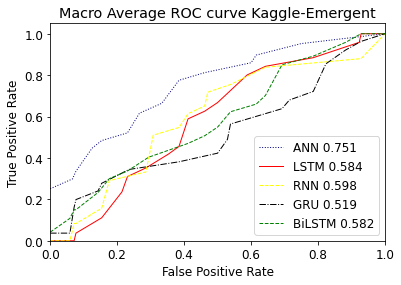

In [140]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import pickle
lw = 1

#For LSTM
fpr_lstm = {}
tpr_lstm = {}
roc_auc_lstm = {}
n_classes=3
yhat_probs = lstm3.predict(X_test, verbose=0)
yhat_classes=yhat_probs.argmax(axis=-1)
for i in range(n_classes):
    fpr_lstm[i], tpr_lstm[i], _ = roc_curve(y_test[:, i], yhat_probs[:, i])
    roc_auc_lstm[i] = auc(fpr_lstm[i], tpr_lstm[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr_lstm[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr_lstm[i], tpr_lstm[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr_lstm["macro"] = all_fpr
tpr_lstm["macro"] = mean_tpr
roc_auc_lstm["macro"] = auc(fpr_lstm["macro"], tpr_lstm["macro"])

#For RNN
fpr_RNN = {}
tpr_RNN = {}
roc_auc_RNN = {}
n_classes=3
yhat_probs = rnn3.predict(X_test, verbose=0)
yhat_classes=yhat_probs.argmax(axis=-1)
for i in range(n_classes):
    fpr_RNN[i], tpr_RNN[i], _ = roc_curve(y_test[:, i], yhat_probs[:, i])
    roc_auc_RNN[i] = auc(fpr_RNN[i], tpr_RNN[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr_RNN[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr_RNN[i], tpr_RNN[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr_RNN["macro"] = all_fpr
tpr_RNN["macro"] = mean_tpr
roc_auc_RNN["macro"] = auc(fpr_RNN["macro"], tpr_RNN["macro"])

#For GRU
fpr_GRU = {}
tpr_GRU = {}
roc_auc_GRU = {}
n_classes=3
yhat_probs = gru3.predict(X_test, verbose=0)
yhat_classes=yhat_probs.argmax(axis=-1)
for i in range(n_classes):
    fpr_GRU[i], tpr_GRU[i], _ = roc_curve(y_test[:, i], yhat_probs[:, i])
    roc_auc_GRU[i] = auc(fpr_GRU[i], tpr_GRU[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr_GRU[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr_GRU[i], tpr_GRU[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr_GRU["macro"] = all_fpr
tpr_GRU["macro"] = mean_tpr
roc_auc_GRU["macro"] = auc(fpr_GRU["macro"], tpr_GRU["macro"])

#For Bi_LSTM
fpr_Bi_LSTM = {}
tpr_Bi_LSTM = {}
roc_auc_Bi_LSTM = {}
n_classes=3
yhat_probs = BiLSTM3.predict(X_test, verbose=0)
yhat_classes=yhat_probs.argmax(axis=-1)
for i in range(n_classes):
    fpr_Bi_LSTM[i], tpr_Bi_LSTM[i], _ = roc_curve(y_test[:, i], yhat_probs[:, i])
    roc_auc_Bi_LSTM[i] = auc(fpr_Bi_LSTM[i], tpr_Bi_LSTM[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr_Bi_LSTM[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr_Bi_LSTM[i], tpr_Bi_LSTM[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr_Bi_LSTM["macro"] = all_fpr
tpr_Bi_LSTM["macro"] = mean_tpr
roc_auc_Bi_LSTM["macro"] = auc(fpr_Bi_LSTM["macro"], tpr_Bi_LSTM["macro"])

fig=pickle.load(open('ROC_Kaggle-Emergent.pickle','rb'))
plt.plot(fpr_lstm["macro"], tpr_lstm["macro"],
         label='LSTM {0:0.3f}'''.format(roc_auc_lstm["macro"]),   color='red', linestyle='-', linewidth=1)
plt.plot(fpr_RNN["macro"], tpr_RNN["macro"],
         label='RNN {0:0.3f}'''.format(roc_auc_RNN["macro"]),   color='yellow', linestyle='--', linewidth=1)
plt.plot(fpr_GRU["macro"], tpr_GRU["macro"],
         label='GRU {0:0.3f}'''.format(roc_auc_GRU["macro"]),   color='black', linestyle='-.', linewidth=1)
plt.plot(fpr_Bi_LSTM["macro"], tpr_Bi_LSTM["macro"],
         label='BiLSTM {0:0.3f}'''.format(roc_auc_Bi_LSTM["macro"]),   color='green', linestyle='--', linewidth=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro Average ROC curve Kaggle-Emergent')
plt.legend(loc='best')
plt.savefig('ROC_Kaggle-Emergent.eps')
plt.show()

In [8]:
dict = {'FALSE' : 0, 'TRUE' : 1, 'Unverified' : 2}
df['CombinedLabel']= df.loc[:,['claim_label']]
df['CombinedLabel']=df['CombinedLabel'].replace(dict)

In [9]:
df['CombinedLabel']

0       2
3       2
12      2
24      0
34      0
       ..
1715    2
1732    2
2130    2
2134    2
2138    2
Name: CombinedLabel, Length: 107, dtype: int64

In [11]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words=set(stopwords.words('english'))
lemma=WordNetLemmatizer()

def clean_review(review_text):
    review_text= re.sub(r'Claim:', ' ', review_text)
    review_text=re.sub(r'http\S+', ' ',review_text) #Removing url
    review_text=re.sub(r'[^a-zA-Z]', ' ',review_text) #Removing Numbers and Punctuation
    review_text= str(review_text).lower()   #Lower casing the sentence
    review_text= word_tokenize(review_text)    #Tokenization
    review_text = [item for item in review_text if item not in stop_words]  # Removing stop_words
    review_text = [lemma.lemmatize(word=w, pos= 'v') for w in review_text]       #Lemmatization
    review_text= [i for i in review_text if len(i)>3]     #Removing small length words
    review_text = ' '.join(review_text)     #converting back to string
    return review_text
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


41


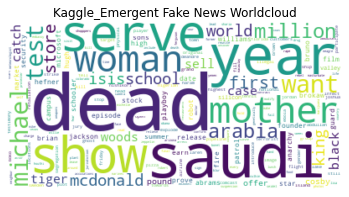

In [77]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df['CleanReview']=df['claim'].apply(clean_review)
text=""
print(len(df[df['CombinedLabel']==0]))
for sentence in list(df[df['CombinedLabel']==0]['CleanReview']):
    text= text + ' ' + sentence
# filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
# text=text.lower()
# for i in filters:
#     text=text.replace(i, ' ')
text_tokens = word_tokenize(text)
# tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

wordfreq = {}
for word in text_tokens:
    wordfreq[word] = wordfreq.setdefault(word, 0) + 1
    


wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=wordfreq)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Kaggle_Emergent Fake News Worldcloud')
fig = plt.gcf()
fig.savefig('Kaggle_Emergent-Fake.eps',transparent=False, bbox_inches='tight', dpi=300)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


25


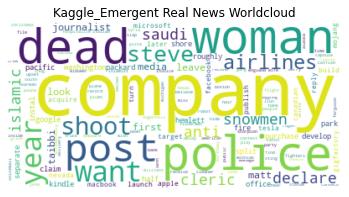

In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df['CleanReview']=df['claim'].apply(clean_review)
text=""
print(len(df[df['CombinedLabel']==1]))
for sentence in list(df[df['CombinedLabel']==1]['CleanReview']):
    text= text + ' ' + sentence
# filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
# text=text.lower()
# for i in filters:
#     text=text.replace(i, ' ')
text_tokens = word_tokenize(text)
# tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

wordfreq = {}
for word in text_tokens:
    wordfreq[word] = wordfreq.setdefault(word, 0) + 1
    


wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=wordfreq)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Kaggle_Emergent Real News Worldcloud')
fig = plt.gcf()
fig.savefig('Kaggle_Emergent-Real.eps',transparent=False, bbox_inches='tight', dpi=300)
plt.show()